1. Basic Import and Loading of data

In [2]:
# Importing libraries

import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline



In [3]:
# Reading Data
df = pd.read_csv("datasets/aerofit_treadmill_data.csv")

In [4]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


2. EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [6]:
df.describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [7]:
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [8]:
# Missing value check
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [10]:
df['Product'].value_counts()

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

In [11]:
df['Gender'].value_counts()

Gender
Male      104
Female     76
Name: count, dtype: int64

2.1 Univaraite Analysis

In [22]:
# Find Categorical, Continuous nermical and Discrete numerical Columns

In [13]:
cat_columns = [i for i in df.columns if df[i].dtype == 'object' ]
cont_columns = [i for i in df.columns if df[i].dtype != 'object' if df[i].nunique()>=10 ]
dis_columns = [i for i in df.columns if df[i].dtype != 'object' if df[i].nunique()<10]
print(f"Categorical columns : {cat_columns}")
print(f"Numerical continuous columns : {cont_columns}")
print(f"Numerical discrete  columns : {dis_columns}")

Categorical columns : ['Product', 'Gender', 'MaritalStatus']
Numerical continuous columns : ['Age', 'Income', 'Miles']
Numerical discrete  columns : ['Education', 'Usage', 'Fitness']


In [17]:
for i in cat_columns+ dis_columns:
    print("-"*60)
    print(df[i].value_counts())
    print()


------------------------------------------------------------
Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

------------------------------------------------------------
Gender
Male      104
Female     76
Name: count, dtype: int64

------------------------------------------------------------
MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

------------------------------------------------------------
Education
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: count, dtype: int64

------------------------------------------------------------
Usage
3    69
4    52
2    33
5    17
6     7
7     2
Name: count, dtype: int64

------------------------------------------------------------
Fitness
3    97
5    31
2    26
4    24
1     2
Name: count, dtype: int64



In [ ]:
# Let us see distribution of all the continous numerical columns

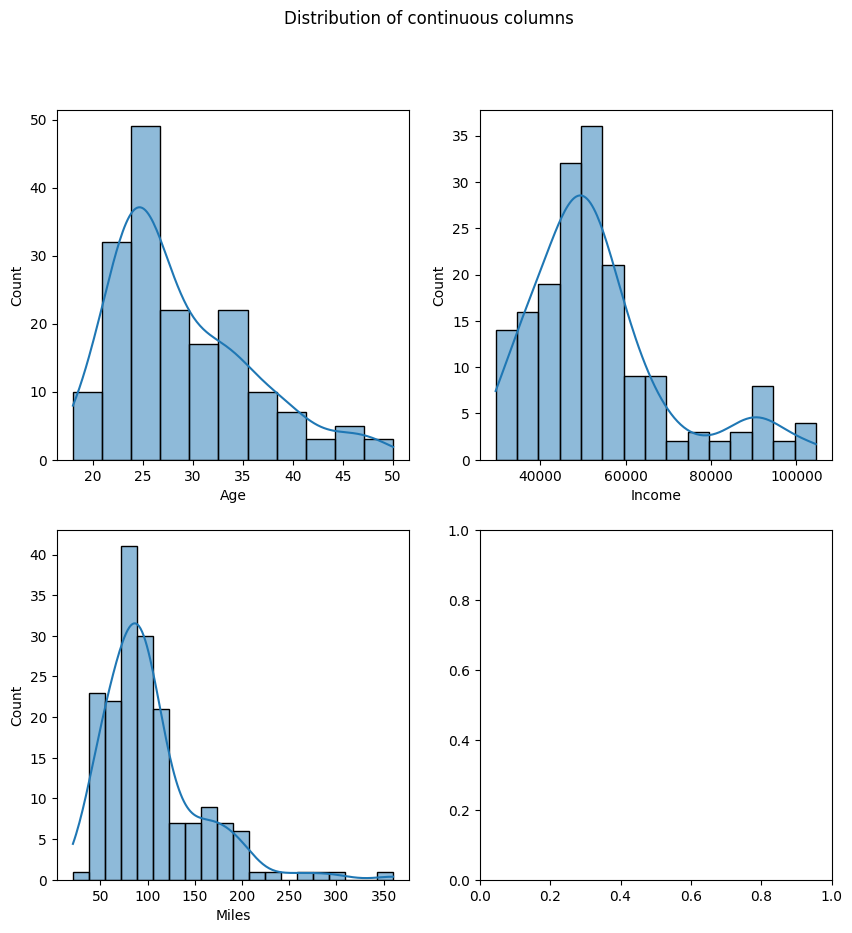

In [109]:
nrows = 2
ncols = 2
fig, axes = plt.subplots(nrows=nrows,ncols=ncols,figsize=(10, 10))
sub = [(i,j) for i in range(nrows) for j in range(ncols)]

fig.suptitle('Distribution of continuous columns ')
for i,j in enumerate(cont_columns):
    ax = axes[sub[i][0],sub[i][1]]
    sns.histplot(data=df,x=j,kde=True, ax=ax)
  #  ax.set_title(f"{j}")
    
plt.show()

In [ ]:
# OBSERVATION
"""
 Majority of Customers fall within the $ 45,000 - $ 60,000 income range
 Income , Miles, Age are rightly skewed

""" 

In [ ]:
# Let us see frequency count of all the discrete numerical columns

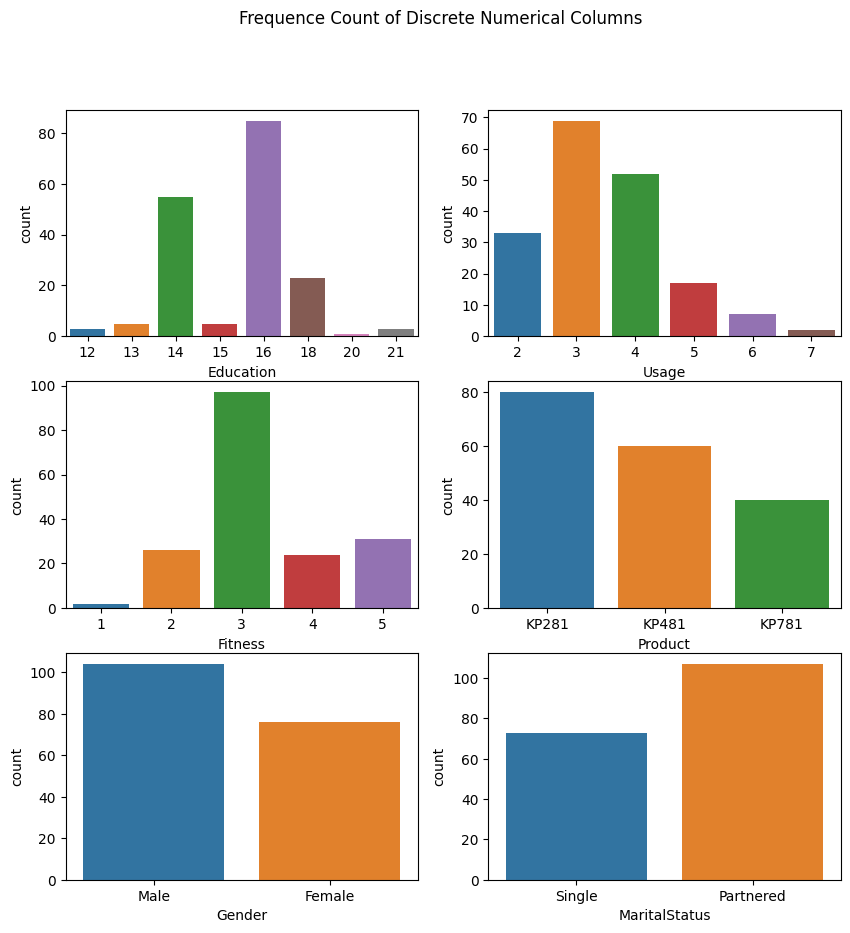

In [122]:
nrows = 3
ncols = 2
fig, axes = plt.subplots(nrows=nrows, ncols = ncols, figsize=(10,10))
sub = [(i,j) for i in range(nrows) for j in range(ncols)]
plt.suptitle("Frequency Count of Discrete Numerical Columns")
for i,j in  enumerate(dis_columns+cat_columns):
    ax = axes[sub[i][0],sub[i][1]]
    sns.countplot(data=df,x=j, ax =ax )

plt.show()

2.2 Bivariate Analysis

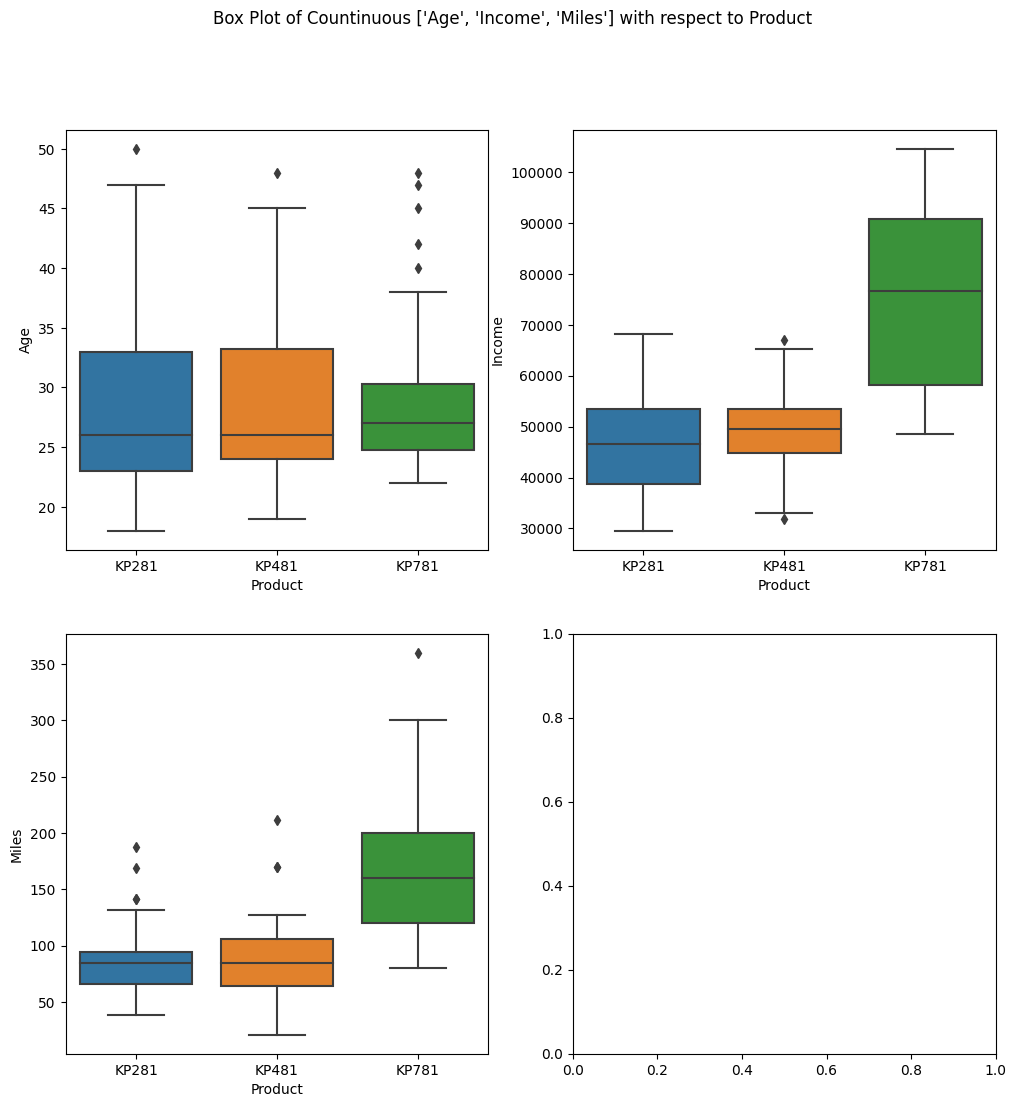

In [129]:
nrows = 2
ncols = 2
fig, axes = plt.subplots(nrows=nrows, ncols = ncols, figsize=(12,12))
sub = [(i,j) for i in range(nrows) for j in range(ncols)]
plt.suptitle(f"Box Plot of Countinuous {cont_columns} with respect to Product ")
for i,j in  enumerate(cont_columns):
    ax = axes[sub[i][0],sub[i][1]]
    sns.boxplot(data=df,x="Product", y=j,ax=ax )

plt.show()



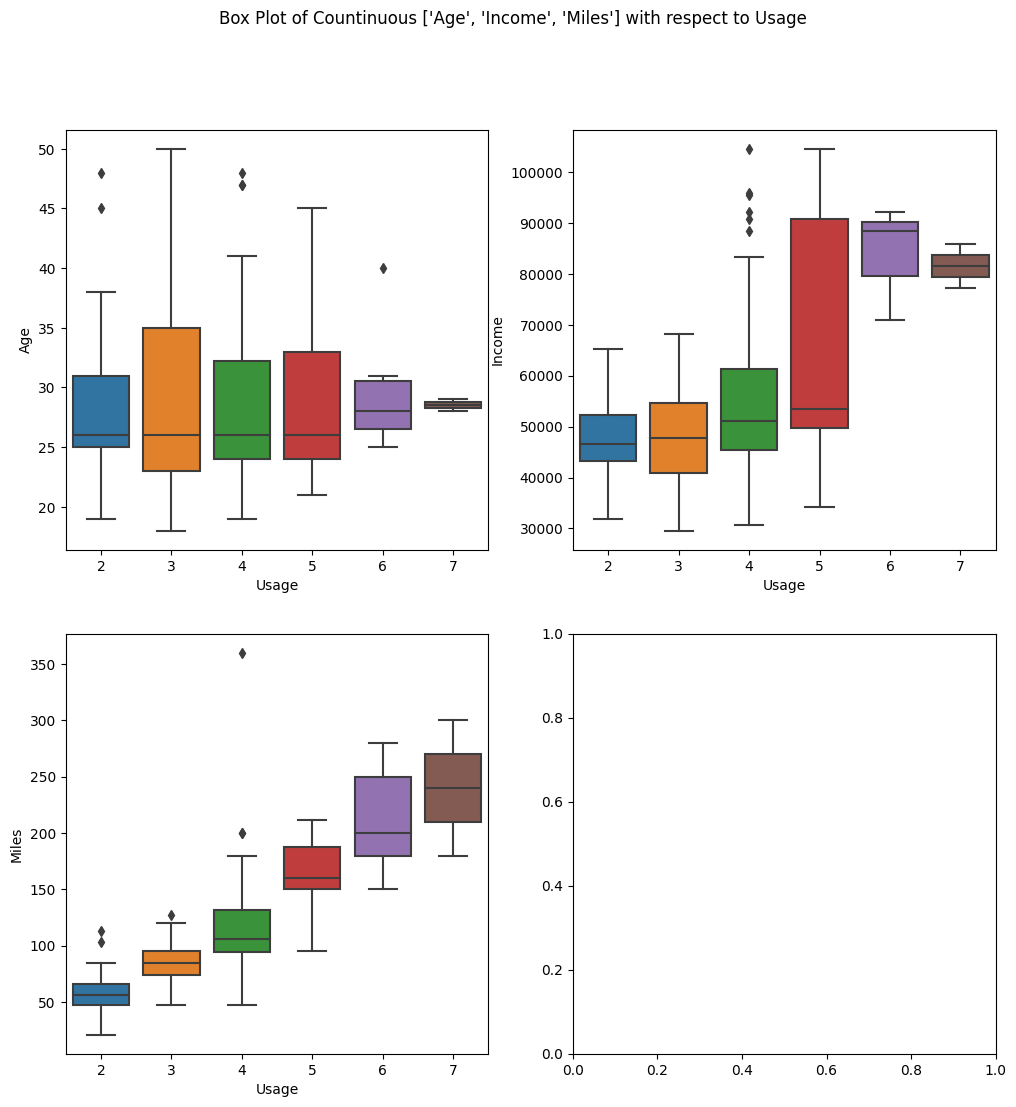

In [18]:
nrows = 2
ncols = 2
fig, axes = plt.subplots(nrows=nrows, ncols = ncols, figsize=(12,12))
sub = [(i,j) for i in range(nrows) for j in range(ncols)]
plt.suptitle(f"Box Plot of Countinuous {cont_columns} with respect to Usage ")
for i,j in  enumerate(cont_columns):
    ax = axes[sub[i][0],sub[i][1]]
    sns.boxplot(data=df,x="Usage", y=j,ax=ax )

plt.show()

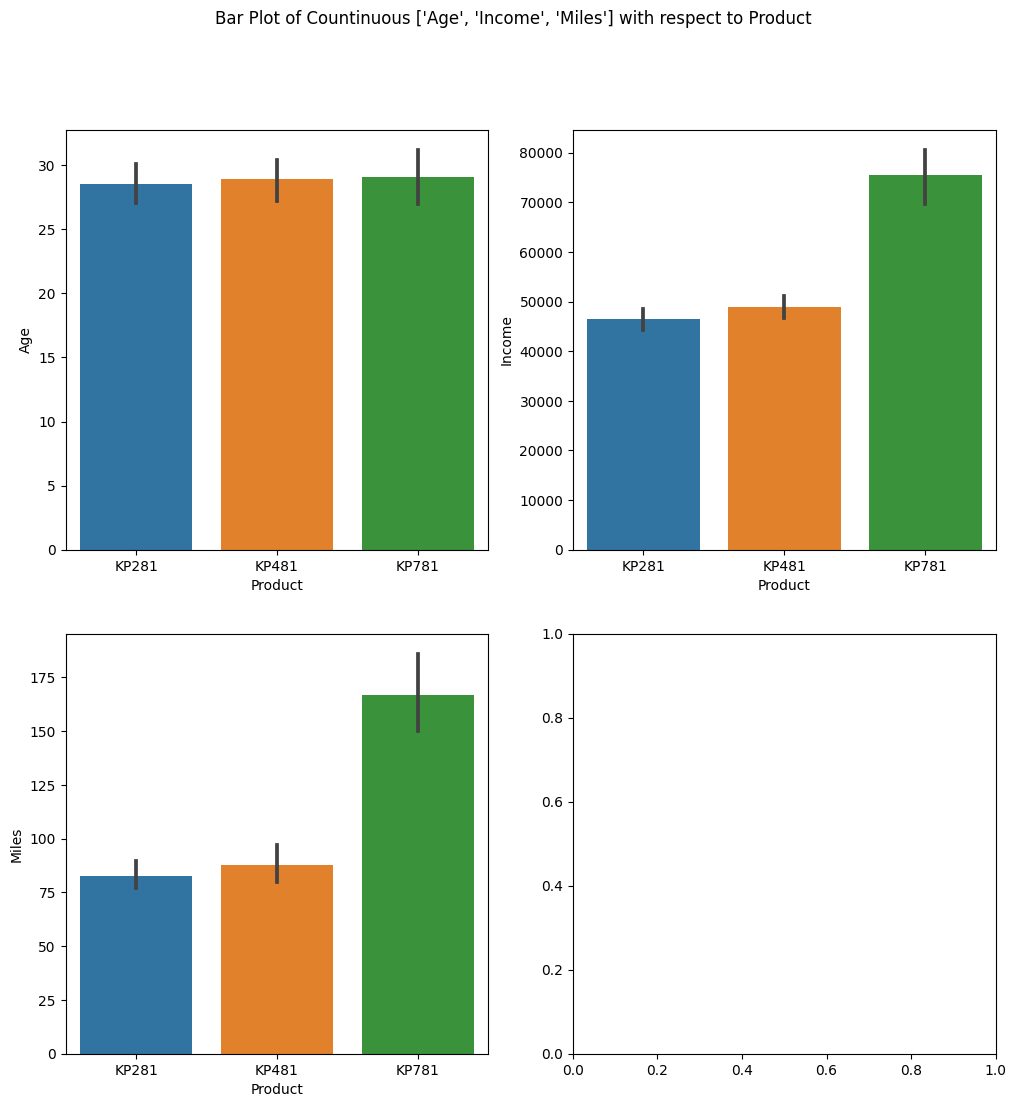

In [132]:

nrows = 2
ncols = 2
fig, axes = plt.subplots(nrows=nrows, ncols = ncols, figsize=(12,12))
sub = [(i,j) for i in range(nrows) for j in range(ncols)]
plt.suptitle(f"Bar Plot of Countinuous {cont_columns} with respect to Product ")
for i,j in  enumerate(cont_columns):
    ax = axes[sub[i][0],sub[i][1]]
    sns.barplot(data=df,x="Product", y=j,ax=ax, estimator=np.mean)

plt.show()



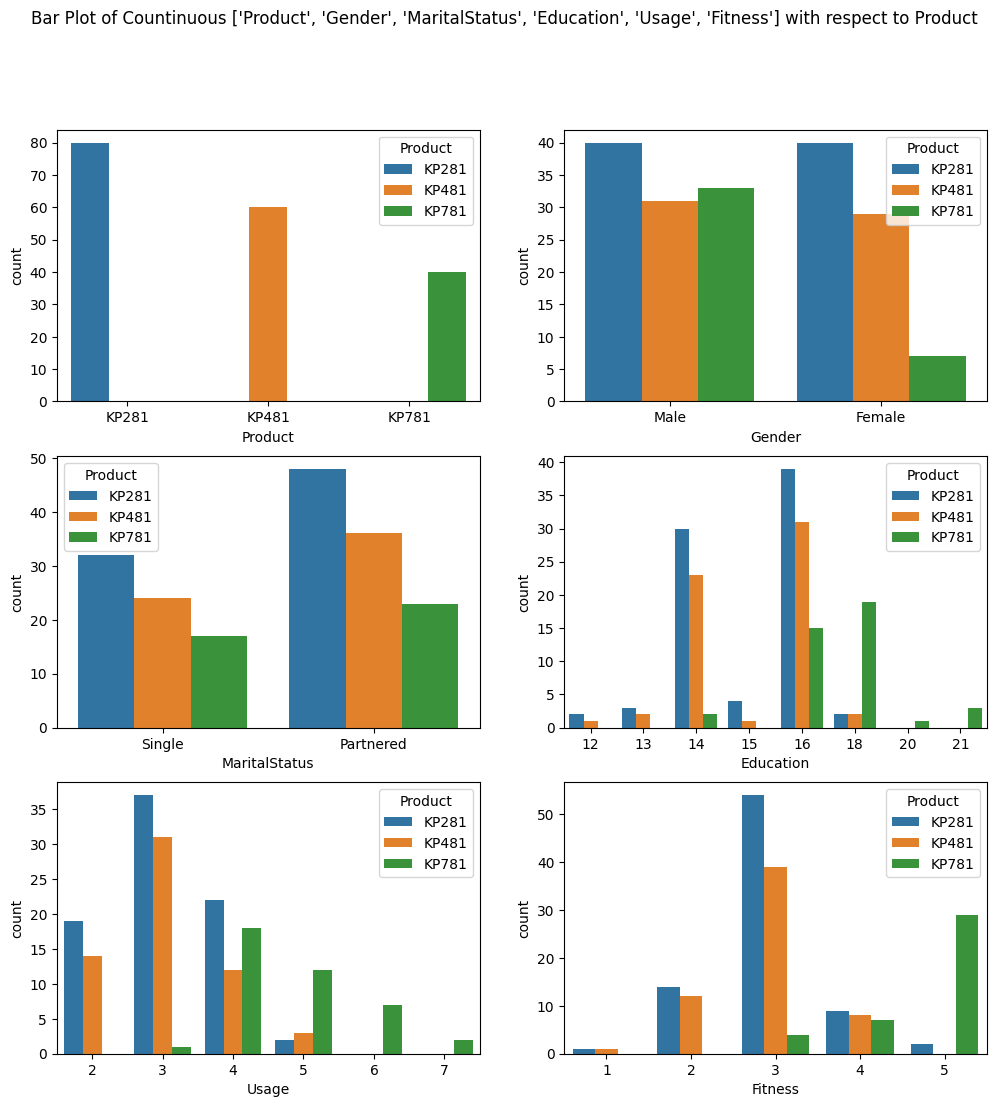

In [138]:
nrows = 3
ncols = 2
fig, axes = plt.subplots(nrows=nrows, ncols = ncols, figsize=(12,12))
sub = [(i,j) for i in range(nrows) for j in range(ncols)]
plt.suptitle(f"CountPlot of Countinuous {cat_columns + dis_columns} with respect to Product ")
for i,j in  enumerate(cat_columns + dis_columns):

    ax = axes[sub[i][0],sub[i][1]]
    sns.countplot(data =df, x=j, hue="Product" ,ax=ax)

plt.show()



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


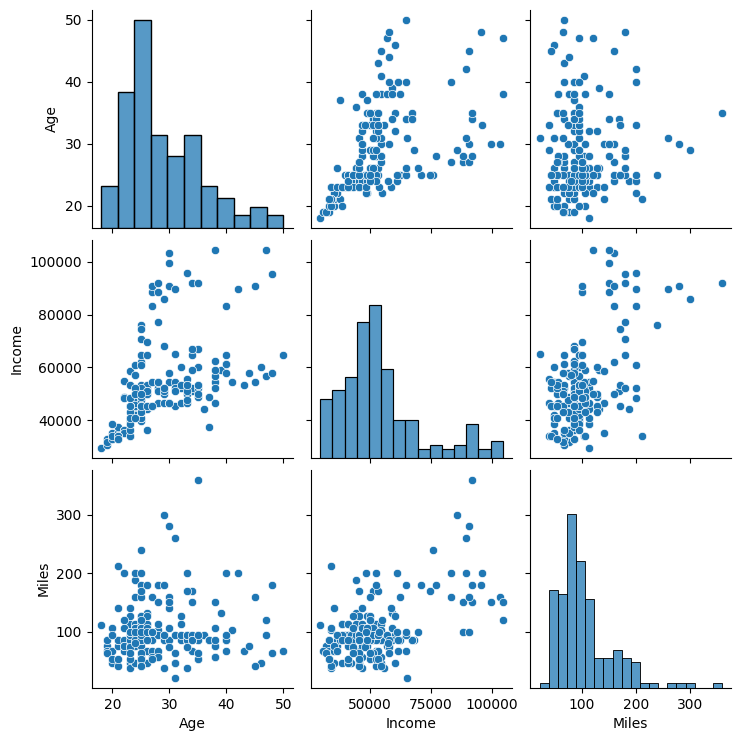

In [55]:
sns.pairplot(data=df[cont_columns])

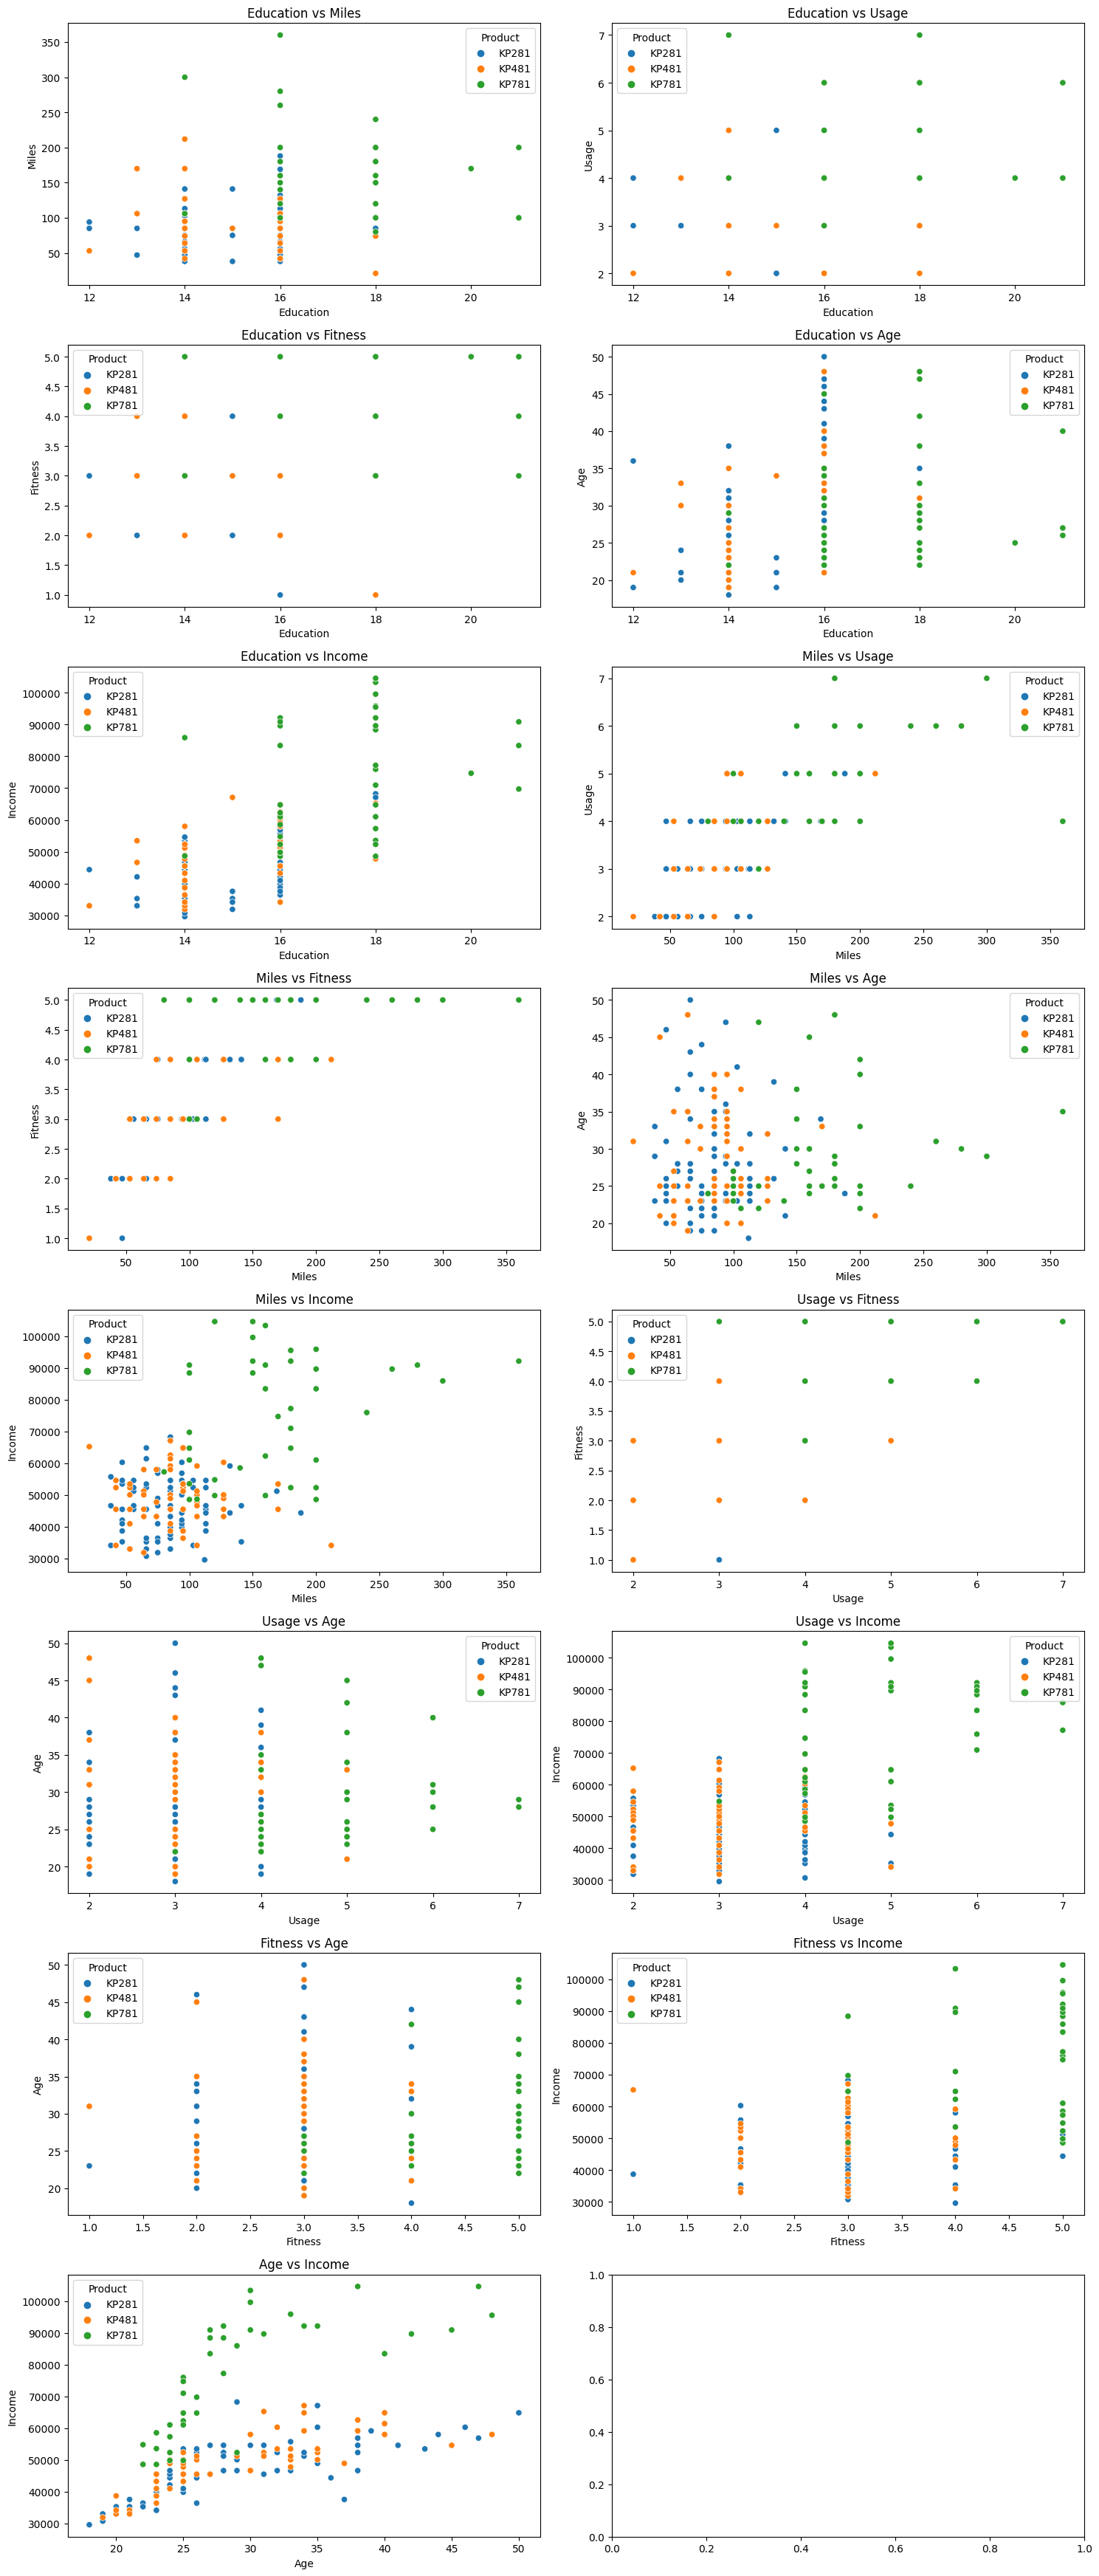

In [151]:
nrows = 8
ncols = 2
fig, axes = plt.subplots(nrows=nrows, ncols = ncols, figsize=(15,35))
sub = [(i,j) for i in range(nrows) for j in range(ncols)]
#plt.suptitle(f"CountPlot of Countinuous {cat_columns + dis_columns} with respect to Product ")

col_list = ['Education', 'Miles', 'Usage', "Fitness","Age", "Income"]
final_col_list = [[col_list[i],col_list[j]] for i in range(len(col_list))  for j in range(len(col_list)) if j >i]

for i,j in  enumerate(final_col_list):

    ax = axes[sub[i][0],sub[i][1]]
    sns.scatterplot(data =df, x=j[0], y =j[1], hue="Product" ,ax=ax)
    ax.set_title(f"{j[0]} vs {j[1]}")

fig.tight_layout()
plt.show()

3. Marginal Probabilities

In [23]:
for i in cat_columns + dis_columns:
    print("-"*50)
    p = round(df[i].value_counts()/len(df)*100 , 2)
    print(p)
    print()

--------------------------------------------------
Product
KP281    44.44
KP481    33.33
KP781    22.22
Name: count, dtype: float64

--------------------------------------------------
Gender
Male      57.78
Female    42.22
Name: count, dtype: float64

--------------------------------------------------
MaritalStatus
Partnered    59.44
Single       40.56
Name: count, dtype: float64

--------------------------------------------------
Education
16    47.22
14    30.56
18    12.78
15     2.78
13     2.78
12     1.67
21     1.67
20     0.56
Name: count, dtype: float64

--------------------------------------------------
Usage
3    38.33
4    28.89
2    18.33
5     9.44
6     3.89
7     1.11
Name: count, dtype: float64

--------------------------------------------------
Fitness
3    53.89
5    17.22
2    14.44
4    13.33
1     1.11
Name: count, dtype: float64



4. Conditional Probabilities

In [50]:
def cond_prob(target,ref_col):
    
    unique = df[ref_col].unique()

    for i in unique:
    
        print("***"*40)
        print(f" \t \tConditional Probability of {target}  given {i}" )
        print("***"*40)
        total  = len(df[df[ref_col] == i])
        print(df[df[ref_col] == i][target].value_counts()/total * 100)
        print()



In [51]:
cond_prob("Product","Gender")

************************************************************************************************************************
 	 	Conditional Probability of Product  given Male
************************************************************************************************************************
Product
KP281    38.461538
KP781    31.730769
KP481    29.807692
Name: count, dtype: float64

************************************************************************************************************************
 	 	Conditional Probability of Product  given Female
************************************************************************************************************************
Product
KP281    52.631579
KP481    38.157895
KP781     9.210526
Name: count, dtype: float64



In [52]:
cond_prob("Product","MaritalStatus")

************************************************************************************************************************
 	 	Conditional Probability of Product  given Single
************************************************************************************************************************
Product
KP281    43.835616
KP481    32.876712
KP781    23.287671
Name: count, dtype: float64

************************************************************************************************************************
 	 	Conditional Probability of Product  given Partnered
************************************************************************************************************************
Product
KP281    44.859813
KP481    33.644860
KP781    21.495327
Name: count, dtype: float64



Insights and Recommendations for Action:

1. The standout performer in our treadmill lineup is model KP281, accounting for a significant 44% of all treadmill sales.
2. A considerable portion of our treadmill customers falls within the income bracket of $45,000 to $80,000.
3. The bulk of treadmill purchases, totaling 83%, come from individuals with incomes ranging between $35,000 and $85,000.
4. Customers with incomes below $35,000 constitute only 8% of our treadmill buyers.
5. The age range of 20 to 40 years represents a whopping 88% of our treadmill consumer base.
6. A strong correlation exists between Miles and Fitness & Miles and Usage, indicating that higher fitness levels correspond to increased treadmill usage.
7. Model KP781 stands out as the preferred choice for customers with over 20 years of education and incomes exceeding $85,000.
8. Customers with fitness levels rated 4 and 5 exhibit a preference for high-end treadmills, with an average weekly usage surpassing 150 miles.


Recommendations:

1. Focus marketing efforts on promoting model KP281, leveraging its popularity to further drive sales.
2. Tailor advertising and product offerings to cater to the income bracket of $45,000 to $80,000, which represents a significant portion of our customer base.
3. Develop targeted marketing strategies to attract customers with incomes below $35,000, aiming to increase their representation among treadmill buyers.
4. Direct marketing initiatives towards the age group of 20 to 40 years, capitalizing on their dominance in our customer demographics.
5. Enhance customer education and engagement regarding the benefits of higher fitness levels, emphasizing the correlation with increased treadmill usage.
6. Position model KP781 as a premium choice for educated and high-income individuals, highlighting its features and benefits tailored to this demographic.
7. Offer promotions or incentives aimed at encouraging customers with fitness levels rated 4 and 5 to invest in high-end treadmills, emphasizing the durability and performance advantages for their intensive usage needs.